In [1]:
#Carga de datos
import pandas as pd
data = pd.read_csv('CLEAN_Compra.csv', encoding= "ISO-8859-1", sep=",")
data.head()

,SEXO,EDAD,INGRESOS,EDAD-RANGO,ESTADO_D,ESTADO_S,FLAG_COMPRA
0,1,19.0,1500,1,0,1,0
1,1,35.0,1600,2,0,0,0
2,0,26.0,3500,1,0,0,0
3,0,27.0,4700,1,0,0,0
4,1,19.0,6300,1,0,1,0


In [2]:
X_data = data.drop(['FLAG_COMPRA'], axis=1)
y_data = data['FLAG_COMPRA']
X_data.shape, y_data.shape

((400, 6), (400,))

In [3]:
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
X_train, X_test, y_train, y_test = train_test_split(
    X_data, 
    y_data, 
    train_size=0.6, 
    random_state=20
)

In [4]:
#MODELAMIENTO 
#ARBOL DE DECISION
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz
arbol = DecisionTreeClassifier(max_depth=5)
arbol.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [5]:
list(X_data.columns)

['SEXO', 'EDAD', 'INGRESOS', 'EDAD-RANGO', 'ESTADO_D', 'ESTADO_S']

In [6]:
y_data.value_counts(dropna=False)

0    257
1    143
Name: FLAG_COMPRA, dtype: int64

In [7]:
predict_train = arbol.predict(X_train)
predict_test = arbol.predict(X_test)

In [8]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, predict_train)

array([[157,   3],
       [  7,  73]])

In [9]:
from sklearn.metrics import accuracy_score
accuracy_train = accuracy_score(y_train, predict_train)
accuracy_train

0.95833333333333337

In [10]:
accuracy_test = accuracy_score(y_test, predict_test)
accuracy_test

0.90625

In [11]:
export_graphviz(arbol, out_file='arbol.dot', class_names=['NO', 'SI'],
               feature_names=list(X_data.columns), impurity=False, filled=True)

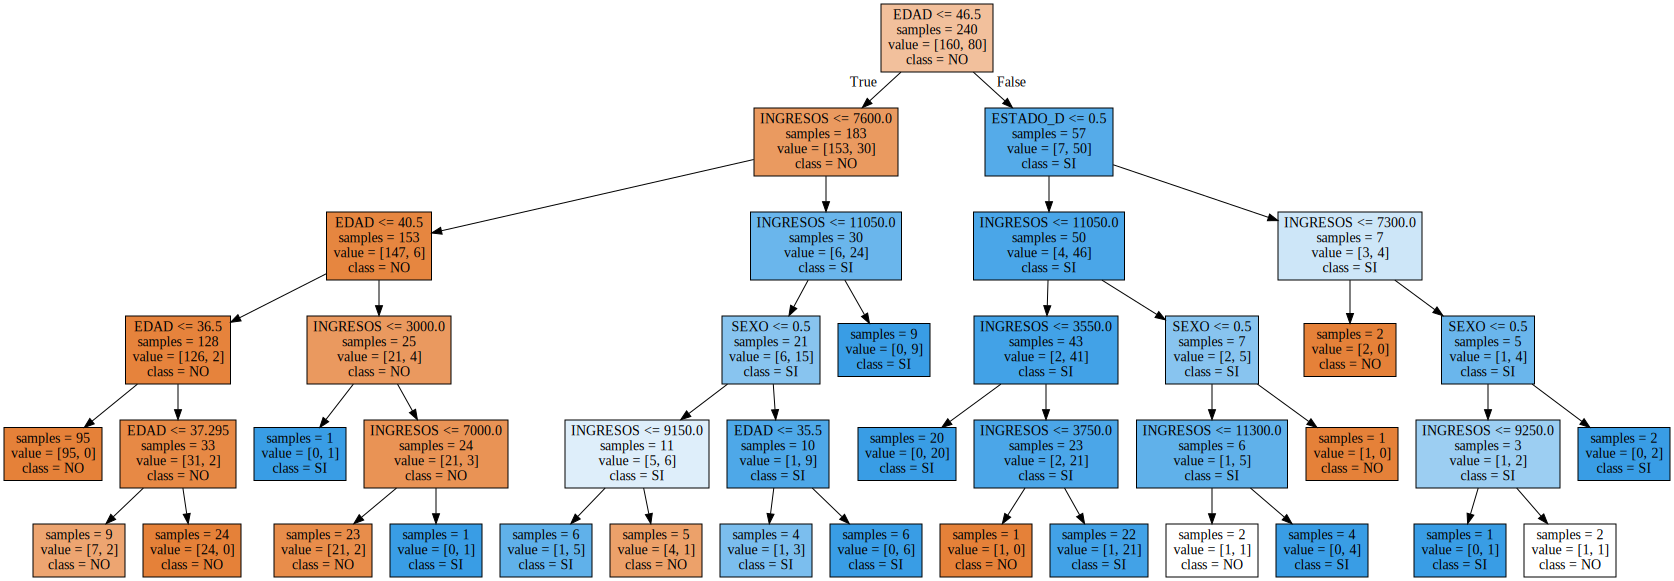

In [12]:
with open('arbol.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)